<a href="https://colab.research.google.com/github/blhuillier/2025B_AstroDataAnalysis/blob/main/Notebooks/Chap_7_Resampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
mycols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Example 1. Jackknife
$$\theta = S^2(X) = \frac 1 N \sum_{i=1}^N (X_i-\bar X)^2$$

# Example 2: Unbiased varaince estimator



# Exercise: Bootstrapping

1. Estimate the parameters and their error with the bootstrap method


In [62]:
import numpy as np
from scipy import stats, optimize
import matplotlib.pyplot as plt

a,b,c = 1,-2,3
theta_true = [a,b,c]

In [63]:
r = np.random.RandomState(42)
NN = 10
xx = r.uniform(0,1,NN)
sigma = 0.05 / (1+xx)
epsilon = r.normal(0,1,NN) * sigma

inv_cov = np.diag(1/epsilon**2)


def func(theta,xx):
  a, b, c = theta
  return a*xx**2 + b*xx + c

yy = func(theta_true, xx) + epsilon

AA = np.vstack((xx**2, xx, np.ones_like(xx))).T
print (AA.shape)

thetahat = np.linalg.solve(AA.T @ inv_cov @ AA, AA.T @ inv_cov @ yy)
print (thetahat)


(10, 3)
[ 1.09723544 -2.10272749  3.01867177]


## Bootstrap esimtation of the uncertainty on $\hat {\theta}$



In [64]:
# number of bootstrap resampling:
BB = 10_000

r = np.random.RandomState(42)


theta_hat_star = np.zeros((BB,3))



for ii in range (BB):
  # this does't work, because we also need to change y and Cov
  # xstar = r.choice(xx, size=NN, replace=True)
  # select the indices with replacement:
  istar = r.randint(NN,size=NN)
  xstar = xx[istar]
  #
  ystar = yy[istar]
  #
  this_inv_cov = inv_cov[np.ix_(istar,istar)]
  AAstar = np.vstack((xstar**2, xstar, np.ones_like(xstar))).T
  theta_hat_star[ii,:] = np.linalg.solve(AAstar.T @ this_inv_cov @ AAstar, AAstar.T @ this_inv_cov @ ystar)

print (theta_hat_star)

[[ 0.86533324 -1.89427684  2.99305696]
 [ 1.22258209 -2.24757618  3.03950356]
 [ 1.30765548 -2.26682745  3.04022193]
 ...
 [ 1.08186227 -2.10305618  3.01920442]
 [ 0.85453471 -1.77067674  2.90176826]
 [ 1.15060629 -2.17879481  3.03363897]]


In [65]:
print (istar)
np.ix_(istar,istar)
print (inv_cov[np.ix_(istar,istar)])

[7 7 6 1 4 4 3 0 3 0]
[[4406.03919082 4406.03919082    0.            0.            0.
     0.            0.            0.            0.            0.        ]
 [4406.03919082 4406.03919082    0.            0.            0.
     0.            0.            0.            0.            0.        ]
 [   0.            0.          150.50923324    0.            0.
     0.            0.            0.            0.            0.        ]
 [   0.            0.            0.         5170.72826185    0.
     0.            0.            0.            0.            0.        ]
 [   0.            0.            0.            0.         9130.49576203
  9130.49576203    0.            0.            0.            0.        ]
 [   0.            0.            0.            0.         9130.49576203
  9130.49576203    0.            0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
     0.         4713.06486366    0.         4713.06486366    0.        ]
 [ 

In [66]:
theta_hat_BS = theta_hat_star.mean(axis=0)
sigma_theta_BS = theta_hat_star.std(axis=0)
print (rf"\hat{{\theta}}^* = {theta_hat_BS}")
print (rf"\sigma(\hat{{\theta}})^* = {sigma_theta_BS}")

\hat{\theta}^* = [ 1.03483206 -2.01298434  2.98524834]
\sigma(\hat{\theta})^* = [0.23202325 0.28125831 0.08766301]


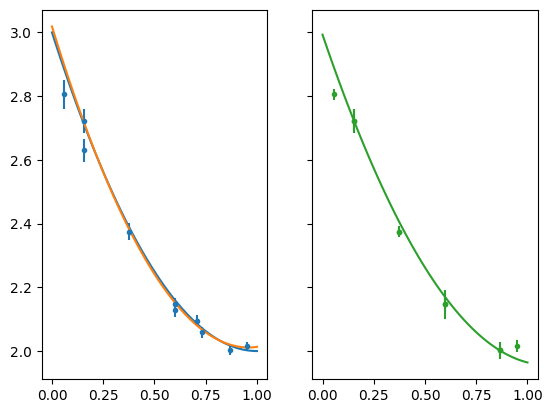

In [67]:
fig, ax = plt.subplots(1,2,sharex=True,sharey=True)
iax = ax[0]
iax.errorbar(xx,yy,sigma / (1+xx),ls='', marker='.')
x0 = np.linspace(0,1,num=101)
iax.plot(x0, func(theta_true,x0), color=mycols[0])
iax.plot(x0, func(thetahat,x0), color=mycols[1])

iax = ax[1]
for ii in range(1):
  iax.errorbar(xstar,ystar,sigma / (1+xx),ls='', marker='.',color=mycols[2])
  iax.plot(x0, func(theta_hat_star[ii],x0), color=mycols[2])






Text(0, 0.5, '$\\hat{c}$')

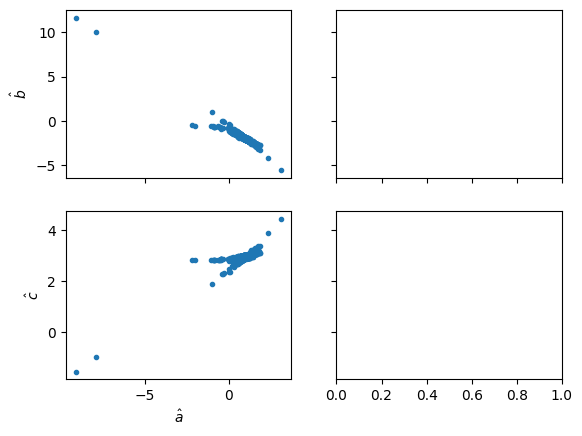

In [68]:
fig, ax = plt.subplots(2,2,sharex='col', sharey='row')
iax = ax[0,0]
iax.scatter(theta_hat_star[:,0],theta_hat_star[:,1],marker='.')
iax.set_ylabel(r"$\hat{b}$")
iax = ax[1,0]
iax.scatter(theta_hat_star[:,0],theta_hat_star[:,2],marker='.')
iax.set_xlabel(r"$\hat{a}$")
iax.set_ylabel(r"$\hat{c}$")



# Exercise - Jacknife

1. Perform a linear fit with the model:
$$y = ax^2 + b x + c$$

2. Estimate (a,b,c) with the Jacknife:
  1. estimate the pseudovalues
  2. Give the mean and standard deviation of $(a,b,c)$
  2. Make a histogram of the pseudo-values
  2. make a triangle plot of the pseudo-values

In [72]:
 # Pseudovalues:

 psistar = np.zeros((NN,len(thetahat)))
 thetahat_i = np.zeros((NN,len(thetahat)))

 for ii in range(NN):
  xstar = np.concatenate((xx[:ii],xx[ii+1:]))
  # print (len(xstar), xstar)
  ystar = np.concatenate((yy[:ii], yy[ii+1:]))
  AA_i = np.vstack((xstar**2, xstar, np.ones_like(xstar))).T
  thissigma = np.concatenate((sigma[:ii], sigma[ii+1:]))
  # print (thissigma.shape)
  this_inv_cov = np.diag(1/thissigma**2)
  thetahat_i[ii] = np.linalg.solve(AA_i.T @ this_inv_cov @ AA_i, AA_i.T @ this_inv_cov @ ystar)
  psistar [ii,:] = NN * thetahat - (NN-1) * thetahat_i[ii,:]
  # print(thetahat_i[ii])

In [76]:

theta_J = psistar.mean(axis=0)
print (theta_J)
# print (thetahat_i.std(axis=0)/np.sqrt(NN))
var_J = ((psistar-theta_J)**2).sum(axis=0) / (NN*(NN-1))
print (np.sqrt(var_J))

theta_dot = thetahat_i.mean(axis=0)
print (f"theta_dot: {theta_dot}")
bias_J = (NN-1)* (theta_dot - thetahat)
print (f" bias_J: {bias_J}")

[ 2.25721822 -3.90018062  3.73736926]
[0.13278921 0.15063745 0.04454823]
theta_dot: [ 0.96834847 -1.90301048  2.9388165 ]
 bias_J: [-1.15998278  1.79745313 -0.71869748]
